In [1]:
import sys
sys.path.insert(1, sys.path[0]+'/../qiskit/providers/aer/')
sys.path.insert(1, sys.path[0]+'/../')

from matplotlib import pyplot as plt
import numpy as np
from qiskit.quantum_info.operators import Operator
from pulse_new.models.signals import VectorSignal, Constant,ConstantSignal,  Signal
from pulse_new.models.operator_models import OperatorModel

X = Operator.from_label('X')
Y = Operator.from_label('Y')
Z = Operator.from_label('Z')

# 1. Basic functionality

In [2]:
r = 1.
w = 1.
signals = [Constant(1.), ConstantSignal(1., w)]
operators = [-1j * 2 * np.pi * w * Z/2, -1j * 2 * np.pi * r * X/2]

model = OperatorModel(operators=operators, signals=signals)

Evaluate at a given time.

In [3]:
print(model.evaluate(0.3))
print(model.evaluate(1.))

[[0.-3.14159265j 0.+0.97080552j]
 [0.+0.97080552j 0.+3.14159265j]]
[[0.-3.14159265j 0.-3.14159265j]
 [0.-3.14159265j 0.+3.14159265j]]


Get the drift (terms corresponding to `Constant` coefficients). In this case just the first term.

In [4]:
model.drift

array([[0.-3.14159265j, 0.+0.j        ],
       [0.+0.j        , 0.+3.14159265j]])

# 2. Enter a frame

In this case, we will enter the frame of the drift.

In [5]:
model.frame_operator = model.drift

Evaluate again.

In [6]:
print(model.evaluate(0.1))
print(model.evaluate(0.2))

[[ 0.        +0.j          1.49391608-2.05619909j]
 [-1.49391608-2.05619909j  0.        +0.j        ]]
[[ 0.        +0.j         0.92329092-0.2999954j]
 [-0.92329092-0.2999954j  0.        +0.j       ]]


In the above, the diagonal part of the model is now $0$, as it has been subtracted when entering the frame (which is coincidentally the diagonal). The off-diagonal part, which ordinarily is $-i 2 \pi r X / 2$ multiplied with an oscillating signal, is now rotating between $-iX$ and $-iY$ as a result of being in the frame. We can plot the real and imaginary parts of the first off-diagonal to see this.

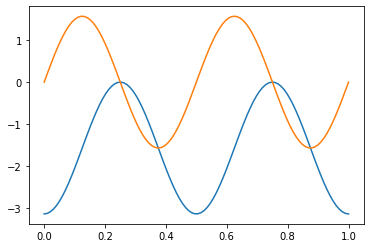

In [7]:
t_vals = np.linspace(0., 1., 100)
model_vals = np.array([model.evaluate(t) for t in t_vals])
offdiag_re = model_vals[:, 0, 1].real
offdiag_im = model_vals[:, 0, 1].imag
plt.plot(t_vals, offdiag_im)
plt.plot(t_vals, offdiag_re)

In the above, the imaginary part is blue, corresponding to the $X$ operator, and the real part is yellow, corresponding to the $Y$ operator. (Note, usually which is imaginary and which is real is swapped, but in this case our `OperatorModel` is defined as the generator of the Schrodinger equation, so everything has a factor of $-i$.

# 3. Set cutoff frequency

Next, we add a cutoff frequency, which eliminates terms in the model oscillating above a given frequency. The frequencies for a given term are a combination of oscillations due to the chosen frame, as well as oscillations due to signal carrier frequencies.

The classic RWA uses the model we have defined, and sets the cutoff to `2*w`.

In [8]:
model.cutoff_freq = 2*w

We now perform the same plot as above.

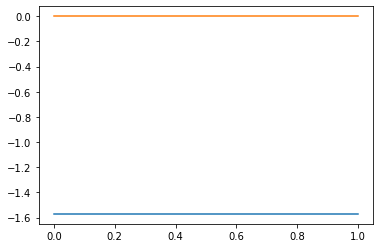

In [9]:
t_vals = np.linspace(0., 1., 100)
model_vals = np.array([model.evaluate(t) for t in t_vals])
offdiag_re = model_vals[:, 0, 1].real
offdiag_im = model_vals[:, 0, 1].imag
plt.plot(t_vals, offdiag_im)
plt.plot(t_vals, offdiag_re)

Observe, the real part is now constant at $-\pi /2$, which is the average of the oscillation in the previous section (similarly, the imaginary part is constant at the corresponding average of $0$).